<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Spring 2019</center></h1>
<h1><center>Homework 3</center></h1>
<h2><center>Ayhan Okuyan - 21601531</center></h2>

<h3><center>Due: May 21, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells. You should upload this .ipynb file with the computed output cells for each code cell.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in cell output.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the required packages section.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        In this homework, you have to implement programming questions on <b>Python 3</b> version programming language.
    </li>
    <li>
        While submitting the homework file, please package your notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li>
        if your code cell does not return outputs correctly, you will lose points for the corresponding question.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
    <li> You can use Google Colab or your own local environment for this homework. You can prefer Google Colab since you have access to GPUs. You do not have to use GPUs to complete this homework though. If you prefer to use your local system, you should follow the below "Environmental Setup" instructions.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries create "requirements.txt" file which contains given required packages and run following command in the activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

If your system has appropriate GPU Driver, CUDA and CuDNN installations, then you can use GPU supported PyTorch as well.

### Required Packages

Additional required packages except PyTorch and Torchvision are defined below.

numpy
pandas
Pillow
matplotlib
scikit-image
scipy

# Question 1 - 35 pts

In this question, you are going to implement a Convolutional Neural Network (CNN) to solve the indoor scene recognition problem. The provided subset of [MIT Indoor67 dataset](http://web.mit.edu/torralba/www/indoor.html) contains images of 10 indoor categories which are <i>bakery, toyshop, dining room, bathroom, library, pool inside, gym, bowling, computer room, hospital room.</i>

In this question, you are going to compare transfer learning and from scratch training approaches.

### Q1.a. Data Loader - 10 pts

We provide you a subset of MIT Indoor dataset. Download our version of MIT Indoor10 dataset from Moodle. You have to implement a custom data loader for the indoor dataset. You can visit [link](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to implement such a data loader. There will be a comparison of training approaches in this question. <b>Both approaches have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Give details about data loading and augmentation steps. How many training, test and validation samples do exist for each class? Do you need to apply augmentations for training, test, and validation sets? Why or why not?

In [1]:
# USE THIS CODE CELL TO SPECIFY ROOT PATH FOR THE DATASET.

# IF YOU USE GOOGLE COLAB, DATA PATH EXAMPLE: 
# root_dir = '/content/gdrive/My\ Drive/CS464/HW3/indoor_data'
# -------------------------------------------------------


# IF YOU USE LOCAL ENVIRONMENT, DATA PATH EXAMPLE:
# root_dir = '/home/user/CS464/HW3/indoor_data'
# -------------------------------------------------------
root_dir = 'C:/Users/Dell/Desktop/ml_HW3/indoor_data' 
# change the value of root_dir variable as your root path

In [2]:
# USE THIS CODE CELL TO IMPLEMENT YOUR DATA LOADER
import pandas as pd
import numpy as np
import torch
import torchvision 
from torch.utils.data.dataset import Dataset

trnsfrm = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class CustomIndoorDataset(Dataset):
    def __init__(self, data_path, transform):
        self.data_path = data_path
        self.tranform = transform
        self.data = torchvision.datasets.ImageFolder(data_path, self.tranform)
    def __getitem__(self,idx):
        img, cl_idx = self.data.__getitem__(idx)
        return img, cl_idx
    def __len__(self):
        return self.data.__len__()
        
dataset = CustomIndoorDataset(root_dir,trnsfrm)

bakery_data = []
bathroom_data = []
bowling_data = []
computer_data = []
dining_data = []
gym_data = []
hospital_data = []
library_data = []
pool_data = []
toy_data = []

for i in range(dataset.__len__()):
    sample, cls = dataset[i]
    sample = np.transpose(sample.numpy(), (1,2,0))
    if(i%100 == 0):
        print(i)
    if cls == 0:
        bakery_data.append(sample)
    elif cls == 1:
        bathroom_data.append(sample)
    elif cls == 2:
        bowling_data.append(sample)
    elif cls == 3:
        computer_data.append(sample)
    elif cls == 4:
        dining_data.append(sample)
    elif cls == 5:
        gym_data.append(sample)
    elif cls == 6:
        hospital_data.append(sample)
    elif cls == 7:
        library_data.append(sample)
    elif cls == 8:
        pool_data.append(sample)
    elif cls == 9:
        toy_data.append(sample)
        
bakery_data = np.asarray(bakery_data)
bathroom_data = np.asarray(bathroom_data)
bowling_data = np.asarray(bowling_data)
computer_data = np.asarray(computer_data)
dining_data = np.asarray(dining_data)
gym_data = np.asarray(gym_data)
hospital_data = np.asarray(hospital_data)
library_data = np.asarray(library_data)
pool_data = np.asarray(pool_data)
toy_data = np.asarray(toy_data)

sep_dataset = [bakery_data, bathroom_data, bowling_data, computer_data, dining_data, gym_data, 
               hospital_data, library_data, pool_data, toy_data]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [3]:
#show image
import matplotlib.pyplot as plt
a = bakery_data[300]
print(a.shape)
plt.imshow(a)
plt.show()

(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 1 Axes>

In [4]:
test_ratio = 0.2
val_ratio = 0.1
test_val_ratio = test_ratio+val_ratio

training_dataset = np.zeros((1,224,224,3))
validation_dataset = np.zeros((1,224,224,3))
test_dataset = np.zeros((1,224,224,3))
training_labels = []
validation_labels = []
test_labels = []

for i in range(sep_dataset.__len__()):
    #fix the seed and shuffle datasets
    np.random.seed(i)
    np.random.shuffle(sep_dataset[i])
    
    #get split indexes
    ind1 = int(np.floor((sep_dataset[i].shape[0])*val_ratio))
    ind2 = int(np.floor((sep_dataset[i].shape[0])*test_val_ratio))
    
    #get lengths of each label
    val_length = (sep_dataset[i])[:ind1].shape[0]
    test_length = (sep_dataset[i])[ind1:ind2].shape[0]
    training_length = (sep_dataset[i]).shape[0] - (val_length + test_length)
    
    #create labels
    for j in range(val_length):
        validation_labels.append(i)
    for j in range(test_length):
        test_labels.append(i)
    for j in range(training_length):
        training_labels.append(i)
        
    #split images
    validation_dataset = np.concatenate([validation_dataset, (sep_dataset[i])[:ind1]], axis=0)
    test_dataset = np.concatenate([test_dataset, (sep_dataset[i])[ind1:ind2]], axis=0)
    training_dataset = np.concatenate([training_dataset, (sep_dataset[i])[ind2:]], axis=0)
                                
    
validation_labels = np.asarray(validation_labels)
test_labels = np.asarray(test_labels)
training_labels = np.asarray(training_labels)

validation_dataset = validation_dataset[1:]
test_dataset = test_dataset[1:]
training_dataset = training_dataset[1:]

print(validation_dataset.shape, validation_labels.shape)
print(test_dataset.shape, test_labels.shape)
print(training_dataset.shape, training_labels.shape)


#shuffle each data with their labels
np.random.seed(0)
idx = np.random.permutation(validation_labels.shape[0])
validation_dataset = validation_dataset[idx]
validation_labels = validation_labels[idx]

idx = np.random.permutation(test_labels.shape[0])
test_dataset = test_dataset[idx]
test_labels = test_labels[idx]

idx = np.random.permutation(training_labels.shape[0])
training_dataset = training_dataset[idx]
training_labels = training_labels[idx]

(212, 224, 224, 3) (212,)
(434, 224, 224, 3) (434,)
(1517, 224, 224, 3) (1517,)


In [5]:
class CustomDataset(Dataset):
    def __init__(self, x, y, transform=torchvision.transforms.ToTensor()):
        self.x = x
        self.y = y
        self.transform = transform
        
    def __getitem__(self,idx):
        return np.transpose(self.x[idx] , (2,0,1)), self.y[idx]
    
    def __len__(self):
        return self.y.shape[0]
    
BATCH_SIZE = 30
    
tr_set = CustomDataset(training_dataset, training_labels)
val_set = CustomDataset(validation_dataset, validation_labels)
test_set = CustomDataset(test_dataset, test_labels)

train_loader = torch.utils.data.DataLoader(tr_set,batch_size=BATCH_SIZE,shuffle=False)
val_loader = torch.utils.data.DataLoader(val_set,batch_size=BATCH_SIZE,shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,shuffle=False)

In [6]:
del sep_dataset
del bakery_data
del bathroom_data
del bowling_data 
del computer_data
del dining_data
del gym_data
del hospital_data
del library_data
del pool_data 
del toy_data 
del dataset

51 15 8
(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


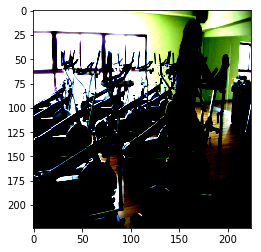

5


In [7]:
print(len(train_loader), len(test_loader), len(val_loader))
#test image set
index = 450
a,l = tr_set[index]
a = np.transpose(a,(1,2,0))
print(a.shape)
plt.imshow(a)
plt.show()
print(l)

<b>Answer for Q1.a.3: </b> 

<font color=blue>I have done many preprocessing in order to arrange the data into a stratified split of validation, test and training. I have created a new Dataset class that takes the splitted images in numpy arrays and gives the output tensors in a transformed and augmented form. As regarding the augmentations, I have resized the images to a 224x224x3 RGB format and then normalized the images for it to fit the Resnet structure which I have used. The normalization coefficients were found from the internet which were the expected values of the R G and B matrices. In the end, there were 1517 training, 434 test and 212 validation samples. </font>

### Q1.b. Convolutional Neural Network (CNN) - 5 pts

The torchvision package contains of popular datasets, model architectures, and common image transformations for computer vision. In this question, you are going to use one of the well known CNN models which already exist in torchvision. Visit [link](https://pytorch.org/docs/stable/torchvision/models.html) to explore models in torchvision. Remember that using deeper or wider networks may increase your training time.
1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class. This class should have a network that you select among torchvision models as an instance member.
2. <font color=blue>\[Written\]</font> State the model you selected and explain why you picked that model. Did you need to modify any part of this model to adopt to your task? 

In [14]:
# USE THIS CODE CELL TO DEFINE CNN CLASS
import torchvision.models as models
import torch.nn.functional as fnc

class CustomCNN(torch.nn.Module):
    def __init__(self, pret=False):
        super(CustomCNN, self).__init__()
        self.r18 = models.resnet18(pretrained=pret)
        if(pret):
            for param in self.r18.parameters():
                param.require_grad = False
        #Three dense layers to lower the data dimension to 10
        self.d1 = torch.nn.Linear(1000, 400)
        self.d2 = torch.nn.Linear(400, 10)
        
    def forward(self,x):
        #pass through alexnet
        out = self.r18(x)
        #pass through the dense layers
        out = fnc.relu(self.d1(out))
        out = fnc.softmax(self.d2(out))
        return out

<b>Answer Q1.b.2:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

<font color=blue>I have implemented this homework on my own computer's GPU using Jupyter, and my GPU has a 6GB capacity. Hence, eve though I tried, I was not able to use bigger structures like Inception.v3 or Resnet 50. However, I was able to find and use Resnet18 which was enough for this classification task. Since most of these structures are designed for ILSVRC competitions with 1000 output labels, I have added a fully connected layer at the end of Resnet18 to drop the output from 1000 to 10. The last activation layer was selected as softmax to obtain likelihood probabilities for the labels.</font>

### Q1.c. Transfer Learning vs Training from Scratch - 13 pts

In this question, are going to compare two different learning approaches: Transfer learning and Learning from scratch. Thanks to using the already implemented CNN model from torchvision, you can easily convert your randomly initialized network to a pretrained network. Do not forget that you are going to solve a multiclass classification problem. According to that, you need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. Use the training, validation and test splits you created Q1.a. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both strategies. You have to print out average values of training loss, training accuracy, validation loss and validation accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the from-scratch-trained model, plot training loss and training accuracy of each iteration (update). Also plot validation loss and accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the transfer learning applied model, plot training loss and training accuracy of each iteration (each update). Also plot validation loss and accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to the validation results, pick the best models for both training approaches. You are going to use these models at the test phase. You need to save them in ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> What are the differences between transfer learning and from scratch learning.
7. <font color=blue>\[Written\]</font> Explain how you selected hyperparameters for both strategies. Did you need to make any hyperparameter changes? 

In [9]:
# USE THIS CODE CELL TO SPECIFY YOUR BEST MODEL PATHS THAT WILL BE USED TO SAVE MODELS.

FROM_SCRATCH_MODEL_PATH = 'C:/Users/Dell/Desktop/ml_HW3/from_scratch.pth'  # change the value of FROM_SCRATCH_MODEL_PATH variable as your path
TRANSFER_LEARNING_MODEL_PATH = 'C:/Users/Dell/Desktop/ml_HW3/tr_learning.pth' # change the value of TRANSFER_LEARNING_MODEL_PATH variable as your path

In [10]:
# USE THIS CODE CELL TO WRITE TRAINING AND VALIDATION FUNCTIONS WHICH ARE COMMON FOR BOTH LEARNING APPROACH.
# PARAMETERS OF TRANING CODE MAY DIFFER ACCORDING TO LEARNING APPROACH.

# --- Representative Code Snippet ---

from torch.autograd import Variable

def train(cnn, optimizer, loss_fcn):
    total_train_loss = 0.0
    correct_pred = 0
    all_pred = 0
    
    for i, data in enumerate(train_loader,0):
        running_loss = 0.0
        
        inputs, labels = data   
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        
        outputs = cnn(inputs.float().cuda())
        loss_sz = loss_fcn(outputs.cuda(), labels.long().cuda())
        loss_sz.backward()
        optimizer.step()
        #training loss
        running_loss += loss_sz.item()
        total_train_loss += loss_sz.item()
        #training accuracy
        _, pred = torch.max(outputs, -1)
        correct_pred += (pred == labels.long().cuda()).sum().item()
        all_pred += [*labels.shape][0]
        
        del outputs, inputs, labels, pred
    acc = correct_pred/all_pred
    err = total_train_loss / len(train_loader)
    print("Average training loss:" + str(err))
    print("Average training accuracy: " + str(acc))
    
    del loss_sz
    return (acc,err)
    
def evaluation(cnn,loss):
    total_val_loss = 0.0
    correct_pred = 0
    all_pred = 0
    
    for inputs, labels in val_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        
        #validation error  
        val_outputs = cnn(inputs.float().cuda())
        val_loss_size = loss(val_outputs.cuda(), labels.long().cuda())
        total_val_loss += val_loss_size.item()
        
        #validation accuracy
        _, pred = torch.max(val_outputs, -1)
        correct_pred += (pred == labels.long().cuda()).sum().item()
        all_pred += [*labels.shape][0]
        del val_outputs, inputs, labels, pred
    del val_loss_size
    acc = correct_pred/all_pred
    err = total_val_loss / len(val_loader)
    print("Average validation loss: " + str(err))
    print("Average validation accuracy: " + str(acc))
    return (acc,err)

In [24]:
# RUN TRAIN FUNCTION FOR THE FROM SCRATCH APPROACH IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.
torch.cuda.empty_cache()

net = CustomCNN().cuda()
net = net.float()
batch_num = len(train_loader)
lrn_rate = 0.1
num_epochs = 60

#create loss and optimizer 
loss = torch.nn.CrossEntropyLoss()
opti = torch.optim.SGD(net.parameters(), lr=lrn_rate)

#define best accuracy
best_acc = 0.0

fs_train_accs = []
fs_train_errs = []
fs_val_errs = []
fs_val_accs = []

for epoch in range(num_epochs):
    print('EPOCH ' + str(epoch+1))
    train_acc, train_err = train(net, opti, loss)
    val_acc, val_err = evaluation(net, loss)
    
    fs_train_accs.append(train_acc)
    fs_train_errs.append(train_err)
    fs_val_accs.append(val_acc)
    fs_val_errs.append(val_err)
    
    if(val_acc>best_acc):
        torch.save(net.state_dict(), FROM_SCRATCH_MODEL_PATH)
        best_acc = val_acc
    
# --- Representative Code Snippet ---
# from_scratch_hyperparameters = {...}
# for epoch_id in range(max_epoch):
#    train(from_scratch_hyperparameters)
#    val_acc = evaluate(from_scratch_hyperparameters) 
#    if val_acc > best_acc:
#        save_model()



EPOCH 1


C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average training loss:2.254300729901183
Average training accuracy: 0.1865524060646012
Average validation loss: 2.244570255279541
Average validation accuracy: 0.2169811320754717
EPOCH 2
Average training loss:2.2014808654785156
Average training accuracy: 0.24192485168094924
Average validation loss: 2.1976840794086456
Average validation accuracy: 0.2688679245283019
EPOCH 3
Average training loss:2.1489620816473867
Average training accuracy: 0.3052076466710613
Average validation loss: 2.114389717578888
Average validation accuracy: 0.33962264150943394
EPOCH 4
Average training loss:2.110906895469217
Average training accuracy: 0.34607778510217535
Average validation loss: 2.1303302943706512
Average validation accuracy: 0.2971698113207547
EPOCH 5
Average training loss:2.0993556134841023
Average training accuracy: 0.34212261041529335
Average validation loss: 2.111662909388542
Average validation accuracy: 0.35377358490566035
EPOCH 6
Average training loss:2.086194157600403
Average training accuracy

In [25]:
del net
torch.cuda.empty_cache()

In [15]:
# RUN TRAIN FUNCTION FOR THE TRANSFER LEARNING APPROACH IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.
torch.cuda.empty_cache()

net = CustomCNN(True).cuda()
net = net.float()
batch_num = len(train_loader)
lrn_rate = 0.1
num_epochs = 20

#create loss and optimizer 
loss = torch.nn.CrossEntropyLoss()
opti = torch.optim.SGD(net.parameters(), lr=lrn_rate)

#define best accuracy
best_acc = 0.0

prt_train_accs = []
prt_train_errs = []
prt_val_errs = []
prt_val_accs = []

for epoch in range(num_epochs):
    print('EPOCH ' + str(epoch+1))
    train_acc, train_err = train(net, opti, loss)
    val_acc, val_err = evaluation(net, loss)
    
    prt_train_accs.append(train_acc)
    prt_train_errs.append(train_err)
    prt_val_accs.append(val_acc)
    prt_val_errs.append(val_err)
    
    if(val_acc>best_acc):
        torch.save(net.state_dict(), TRANSFER_LEARNING_MODEL_PATH)
        best_acc = val_acc
    

# --- Representative Code Snippet ---

# transfer_learning_hyperparameters = {...}
# for epoch_id in range(max_epoch):
#    train(transfer_learning_hyperparameters)
#    val_acc = evaluate(transfer_learning_hyperparameters) 
#    if val_acc > best_acc:
#        save_model()

EPOCH 1


C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average training loss:1.8300938863380283
Average training accuracy: 0.6671061305207646
Average validation loss: 1.7086346745491028
Average validation accuracy: 0.8254716981132075
EPOCH 2
Average training loss:1.6046993194841872
Average training accuracy: 0.8648648648648649
Average validation loss: 1.7007516771554947
Average validation accuracy: 0.8537735849056604
EPOCH 3
Average training loss:1.5428781065286374
Average training accuracy: 0.9202373104812129
Average validation loss: 1.6864475905895233
Average validation accuracy: 0.8726415094339622
EPOCH 4
Average training loss:1.5226701498031616
Average training accuracy: 0.9393539881344759
Average validation loss: 1.6891316324472427
Average validation accuracy: 0.8490566037735849
EPOCH 5
Average training loss:1.497129379534254
Average training accuracy: 0.965721819380356
Average validation loss: 1.6581152230501175
Average validation accuracy: 0.9056603773584906
EPOCH 6
Average training loss:1.4729545209922044
Average training accuracy:

In [16]:
del net
torch.cuda.empty_cache()

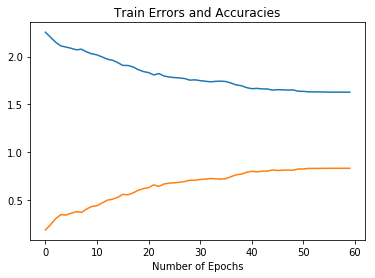

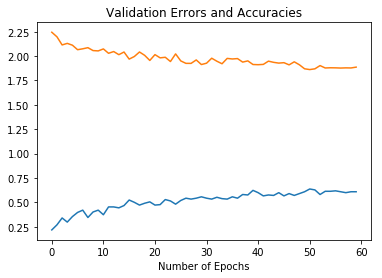

In [26]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE FROM SCRATCH LEARNING [Answer: Q1.c.2]
plt.plot(fs_train_errs)
plt.plot(fs_train_accs)
plt.title('Train Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.show()
plt.title('Validation Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.plot(fs_val_accs)
plt.plot(fs_val_errs)
plt.show()

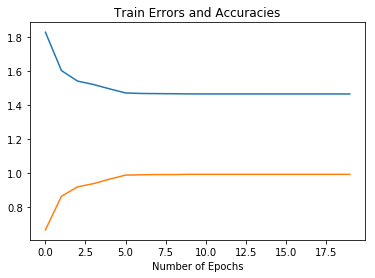

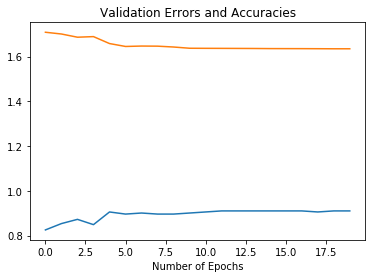

In [18]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE TRANSFER LEARNING [Answer: Q1.c.3]
plt.plot(prt_train_errs)
plt.plot(prt_train_accs)
plt.title('Train Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.show()
plt.title('Validation Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.plot(prt_val_accs)
plt.plot(prt_val_errs)
plt.show()

<b>Answer for Q1.c.5:</b>

<font color=blue>The chosen loss funciton is cross entropy since the task at hand is multiclass classification. The NLL Loss was also tried in the process, however cross entropy has given better results.</font>

<b>Answer for Q1.c.6:</b>

<font color=blue>In transfer learning, the weights of the network are already trained with the image set called ImageNet, which has 1,281,167 images for the training, plus the successful models built by companies tend to give good results no matter what the task is. However, in from scratch learning, we only use the architecture that is given and not the pretrained weights. Although the models are good models, we of course expect this to train more poorly since more data yield to better results.</font>

<b>Answer for Q1.c.7:</b>

<font color=blue>In neural networks, there are many hyperparameters that should be configured for a successful model. In our case, the number of dense layers at the output, the number of nodes each layer would contain, the batch size, learning rate, the additional layers that I have used such as batch normalization are all hyperparameters, and practically it is impossible to do a grid search for these parameters since thst would take a huge amount of time. I have tried the strategy to first fix the model and change the other parameters one by one to find the best case, and if the model was not deep enough, add layers and continue, which was generally a good approach.</font>

### Q1.d. Test Classifiers - 7 pts

You should have obtained two trained networks so far. One of them comes from a transfer learning approach and the other network is from from-scratch-trained approach. In this case, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained with the transfer learning approach. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained from scratch. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [1.] question.
4. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [2.] question.
5. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
6. <font color=blue>\[Written\]</font> Give the test set accuracy values for these two models. Which training approach does work better than the other? Explain why?

In [19]:
# USE THIS CODE CELL TO IMPLEMENT TEST FUNCTION WHICH IS COMMON FOR BOTH MODEL
def test(cnn,loss):
    total_test_loss = 0.0
    correct_pred = 0
    all_pred = 0
    
    all_preds = []
    all_labels = []
    
    for inputs, labels in test_loader:
        all_labels.append(labels)
        inputs, labels = Variable(inputs), Variable(labels)
        #validation error  
        test_outputs = cnn(inputs.float().cuda())
        val_loss_size = loss(test_outputs.cuda(), labels.long().cuda())
        total_test_loss += val_loss_size.item()
        
        #validation accuracy
        _, pred = torch.max(test_outputs, -1)
        correct_pred += (pred == labels.long().cuda()).sum().item()
        all_pred += [*labels.shape][0]
        
        all_preds.append(pred.cpu().numpy())
        
        del test_outputs, inputs, labels
    acc = correct_pred/all_pred
    err = total_test_loss / len(val_loader)
    print("Average test loss: " + str(err))
    print("Average test accuracy: " + str(acc))
    return all_preds, all_labels


In [20]:
# USE THIS CODE CELL TO LOAD BEST MODEL WHICH USES TRANSFER LEARNING APPROACH
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

model = CustomCNN(True).cuda()
model.load_state_dict(torch.load(TRANSFER_LEARNING_MODEL_PATH))
tr_preds, tr_lbls = test(model,loss)
tr_lbls = np.concatenate(tr_lbls)
tr_preds = np.concatenate(tr_preds)

del model
torch.cuda.empty_cache()

C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average test loss: 2.957231655716896
Average test accuracy: 0.8917050691244239


In [27]:
# USE THIS CODE CELL TO LOAD BEST MODEL WHICH IS TRAINED FROM SCRATCH
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

model = CustomCNN().cuda()
model.load_state_dict(torch.load(FROM_SCRATCH_MODEL_PATH))
fs_preds, fs_lbls = test(model,loss)
fs_lbls = np.concatenate(fs_lbls)
fs_preds = np.concatenate(fs_preds)

del model
torch.cuda.empty_cache()

C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average test loss: 3.506324201822281
Average test accuracy: 0.5829493087557603


'bakery','bathroom','bowling','computer room','dining room','gym','hospital room','library','pool inside','toyshop'

C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


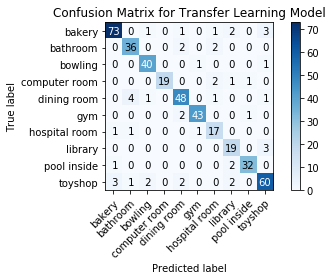

In [22]:
# USE THIS CODE CELL TO CREATE CONFUSION MATRIX [Answer: Q1.d.3]
# YOU CAN USE sklearn.metrics package to compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(tr_lbls, tr_preds, labels=[0,1,2,3,4,5,6,7,8,9])
ind_classes = ['bakery','bathroom','bowling','computer room','dining room','gym',
           'hospital room','library','pool inside','toyshop']
title = "Confusion Matrix for Transfer Learning Model"
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=ind_classes, yticklabels=ind_classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], '2d'),ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
fig.show()

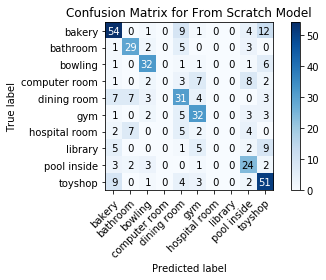

In [28]:
# USE THIS CODE CELL TO CREATE CONFUSION MATRIX [Answer: Q1.d.4]
# YOU CAN USE sklearn.metrics package to compute confusion matrix
cm2 = confusion_matrix(fs_lbls, fs_preds, labels=[0,1,2,3,4,5,6,7,8,9])
title = "Confusion Matrix for From Scratch Model"
fig, ax = plt.subplots()
im = ax.imshow(cm2, interpolation='nearest', cmap='Blues')
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm2.shape[1]),
       yticks=np.arange(cm2.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=ind_classes, yticklabels=ind_classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cm2.max() / 2.
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(j, i, format(cm2[i, j], '2d'),ha="center", va="center", color="white" if cm2[i, j] > thresh else "black")
fig.tight_layout()
fig.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

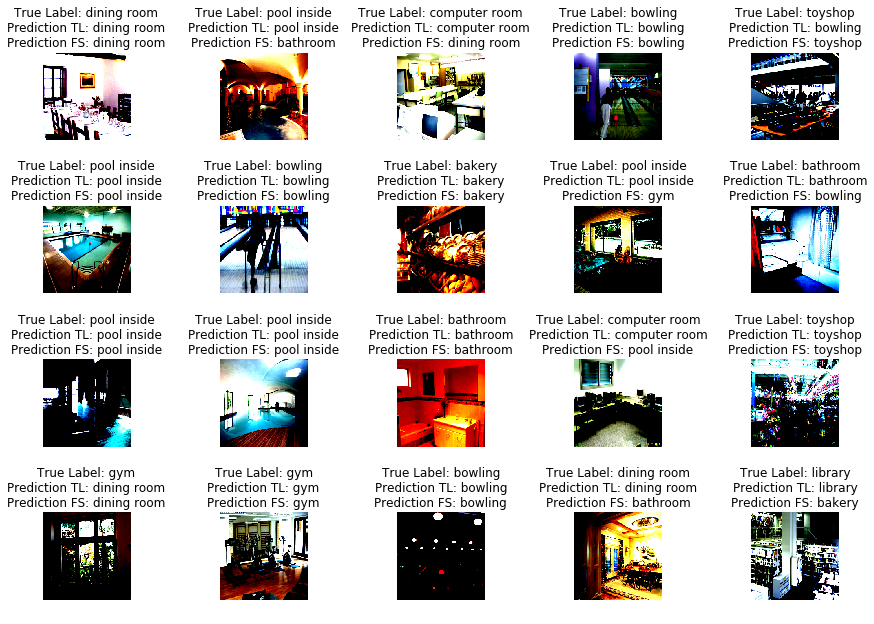

In [35]:
# USE THIS CODE CELL TO DISPLAY RANDOMLY SELECTED TEST SAMPLES WITH THEIR PREDICTED AND TARGET LABELS [Answer: Q1.d.5]
row = 4
col = 5
fig = plt.figure()
plt.subplots_adjust(left=0.125,right=2.0,bottom=0.1,top=2.0, wspace=0.75, hspace=0.75)

for i in range(row*col):
    rand_index = np.random.randint(test_set.__len__())
    sample,label = test_set[rand_index]
    ax = plt.subplot(row, col, i + 1)

    ax.set_title('True Label: ' + ind_classes[label] + '\nPrediction TL: ' + ind_classes[tr_preds[rand_index]]
                 + '\nPrediction FS: ' + ind_classes[fs_preds[rand_index]])
    sample = np.transpose(sample,(1,2,0))
    plt.imshow(sample)
    ax.axis('off')
    ax.autoscale(True)
plt.show()

<b>Answer for Q1.d.6:</b>

<font color=blue>The accuracy for the transfer learning was found to be 89% and the form scratch model to be 58%. These are expected results since the pretrained weights are much more closer to a better classification than the random weights since they are already trained with a bunch of data. </font>

## Question 2 - 65 pts

In this question, you are going to implement both a Convolutional Neural Network (CNN) architecture and a Multilayer Perceptron (MLP) to solve the bird type classification problem. As the dataset, you will use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. The dataset consists of 11.788 photos of 200 bird species. The dataset provides you bounding boxes, image labels, and training-test splits. DO NOT FORGET THAT YOU WILL NOT USE TRAINING-TEST SPLIT WHICH IS PROVIDED BY DATASET. YOU WILL SPLIT THE DATASET INTO TRAINING, TEST AND VALIDATION SETS YOURSELF.

You are free to choose your neural network architecture in this question but there will be a minimum performance threshold and your network's performance will affect your grade for this question. The thresholds and metric types are specified in corresponding questions.

<b>Note: You should be able to achieve these goals with training time < a day on a GPU.</b>

### Q2.a. Data Loader - 15 pts

In this question you are going to use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. Download the dataset from given [link](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html). You have to implement a custom data loader. Notice that photos are not tightly cropped. You may choose to crop images by using bounding boxes which exist in the dataset. Note that you will build CNN and MLP architectures and input types should be different for these networks. You should prepare data loaders by considering this situation. You may need to convert images to grayscale format to train the MLP model. <b>MLP and CNN architectures have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Explain your augmentation method differences for two models? 



In [2]:
# USE THIS CODE CELL TO SPECIFY ROOT PATH FOR THE DATASET.

# IF YOU USE GOOGLE COLAB, DATA PATH EXAMPLE: 
# root_dir = '/content/gdrive/My\ Drive/CS464/HW3/CUB_200_2011'
# -------------------------------------------------------


# IF YOU USE LOCAL ENVIRONMENT, DATA PATH EXAMPLE:
# root_dir = '/home/user/CS464/HW3/CUB_200_2011'
# -------------------------------------------------------

root_dir = 'C:/Users/Dell/Desktop/ml_HW3/CUB_200_2011/' # change the value of root_dir variable as your root path

In [3]:
# USE THIS CODE CELL TO IMPLEMENT YOUR DATA LOADER
from PIL import Image
import pandas as pd
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
import torchvision.models as models
import torch.nn.functional as fnc
import matplotlib.pyplot as plt
from torch.autograd import Variable
import cv2



boxes = pd.read_csv(root_dir+'bounding_boxes.txt', header=None, sep = ' ', names = ['id', 'x', 'y', 'w', 'h'])
classes = pd.read_csv(root_dir+'classes.txt', header=None, sep = ' ', names= ['clNo', 'clName'])
img_labels = pd.read_csv(root_dir+'image_class_labels.txt', header=None, sep = ' ', names=['idx', 'label'])
img_nms = pd.read_csv(root_dir+'images.txt', header=None, sep = ' ', names=['idx', 'name'])

image_folder_path = root_dir + 'images/'

val_rat = 0.1
test_rat = 0.2
val_test_rat = 0.3

val_data = pd.DataFrame(columns = ['idx', 'label', 'name'])
test_data = pd.DataFrame(columns = ['idx', 'label', 'name'])
train_data = pd.DataFrame(columns = ['idx', 'label', 'name'])

img_data = pd.concat([img_labels, img_nms['name']], axis=1)
num_classes = classes.shape[0]

for i in range(num_classes):
    #get the names and labels which labels are i
    i_img_data = img_data.loc[img_data['label']==i+1]
    i_img_data = i_img_data.reset_index(drop=True)
    #get the size of the extracted dataframe
    i_sample_size = len(i_img_data)
    #shuffle extracted datarame
    i_img_data = i_img_data.sample(frac=1).reset_index(drop=True)
     
    ind1 = int(np.floor(val_rat * i_sample_size))
    ind2 = int(np.floor(val_test_rat * i_sample_size))
    
    i_val_data = i_img_data.iloc[:ind1]
    i_test_data = i_img_data.iloc[ind1:ind2]
    i_train_data = i_img_data.iloc[ind2:]
    
    val_data = pd.concat([val_data, i_val_data], sort=False)
    test_data = pd.concat([test_data, i_test_data], sort=False)
    train_data = pd.concat([train_data, i_train_data], sort=False)

val_data = val_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
train_data = train_data.sample(frac=1).reset_index(drop=True)
print(val_data.head(5))
print(test_data.head(5))
print(train_data.head(5))

i_img_data = img_data.loc[img_data['label']==i+1]


min_w = 100
min_h = 100
dim_cnn = 224

#CNN transform
trnsfrm_cnn = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((dim_cnn,dim_cnn)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#MLP transform
trnsfrm_mlp = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((min_w,min_h)),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.456], std=[0.224])
])
                    
class CustomBirdDataset(Dataset):
    def __init__(self, data_df, clN_df, img_foldr_pth ,boxs, trnsfrm):
        self.data_df = data_df
        self.boxs = boxs
        self.img_foldr_pth = img_foldr_pth
        self.clN_df = clN_df
        self.trnsfrm = trnsfrm
        self.imgs = []
        self.lbs = []
        for i in range(len(self.data_df)):
            self.rndSample = self.data_df.iloc[i]

            self.class_id = self.rndSample.loc['label']
            self.f_path = self.img_foldr_pth + '/' + self.rndSample['name']
            self.img = cv2.imread(self.f_path,cv2.IMREAD_UNCHANGED)
            self.img_id = self.rndSample['idx']
            self.bound_box = self.boxs.loc[self.boxs['id'] == self.img_id]
            self.class_name = (self.clN_df.loc[self.clN_df['clNo'] == self.class_id])['clName']
            y = int(self.bound_box['y'])
            h = int(self.bound_box['h'])
            x = int(self.bound_box['x'])
            w = int(self.bound_box['w'])
            self.img = self.img[y:y+h,x:x+w]
            if(self.img.ndim == 2):
                self.img = np.expand_dims(self.img, axis=2)
                self.img = np.concatenate((self.img,self.img,self.img), axis=2)
            self.img = self.trnsfrm(self.img)
            self.imgs.append(self.img)
            self.lbs.append(self.class_id) 
        
    def __getitem__(self,index):
        return self.imgs[index], self.lbs[index]
    
    def __len__(self):
        return len(self.data_df)


train_set_cnn = CustomBirdDataset(train_data, classes, image_folder_path, boxes, trnsfrm_cnn)  
print(train_set_cnn.__len__())
val_set_cnn = CustomBirdDataset(val_data, classes, image_folder_path, boxes, trnsfrm_cnn)
print(val_set_cnn.__len__())
test_set_cnn = CustomBirdDataset(test_data, classes, image_folder_path, boxes, trnsfrm_cnn)
print(test_set_cnn.__len__())


train_set_mlp = CustomBirdDataset(train_data, classes, image_folder_path, boxes, trnsfrm_mlp) 
print(train_set_mlp.__len__())
val_set_mlp = CustomBirdDataset(val_data, classes, image_folder_path, boxes, trnsfrm_mlp)
print(val_set_mlp.__len__())
test_set_mlp = CustomBirdDataset(test_data, classes, image_folder_path, boxes, trnsfrm_mlp)
print(test_set_mlp.__len__())

     idx label                                               name
0   4419    76  076.Dark_eyed_Junco/Dark_Eyed_Junco_0114_67964...
1   5946   102  102.Western_Wood_Pewee/Western_Wood_Pewee_0041...
2   4219    73               073.Blue_Jay/Blue_Jay_0022_63074.jpg
3   6955   119    119.Field_Sparrow/Field_Sparrow_0066_114109.jpg
4  11198   191  191.Red_headed_Woodpecker/Red_Headed_Woodpecke...
     idx label                                               name
0   4793    83  083.White_breasted_Kingfisher/White_Breasted_K...
1   1451    26  026.Bronzed_Cowbird/Bronzed_Cowbird_0031_24139...
2   6806   117  117.Clay_colored_Sparrow/Clay_Colored_Sparrow_...
3  10229   174      174.Palm_Warbler/Palm_Warbler_0044_169319.jpg
4   5741    98      098.Scott_Oriole/Scott_Oriole_0036_795850.jpg
     idx label                                               name
0  11015   188  188.Pileated_Woodpecker/Pileated_Woodpecker_00...
1    423     8  008.Rhinoceros_Auklet/Rhinoceros_Auklet_0005_2...
2   9989  

In [4]:
BATCH_SIZE_MLP = 64
BATCH_SIZE_CNN = 64

train_loader_mlp = torch.utils.data.DataLoader(train_set_mlp,batch_size=BATCH_SIZE_MLP,shuffle=False)
val_loader_mlp = torch.utils.data.DataLoader(val_set_mlp,batch_size=BATCH_SIZE_MLP,shuffle=False)
test_loader_mlp = torch.utils.data.DataLoader(test_set_mlp, batch_size=BATCH_SIZE_MLP,shuffle=False)

train_loader_cnn = torch.utils.data.DataLoader(train_set_cnn,batch_size=BATCH_SIZE_CNN,shuffle=False)
val_loader_cnn = torch.utils.data.DataLoader(val_set_cnn,batch_size=BATCH_SIZE_CNN,shuffle=False)
test_loader_cnn = torch.utils.data.DataLoader(test_set_cnn, batch_size=BATCH_SIZE_CNN,shuffle=False)

print(len(train_loader_mlp), len(test_loader_mlp), len(val_loader_mlp))
print(len(train_loader_cnn), len(test_loader_cnn), len(val_loader_cnn))

130 37 18
130 37 18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


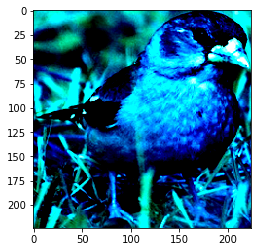

55


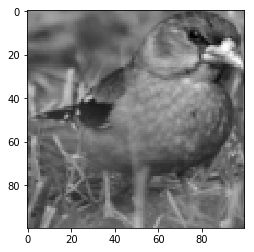

55


In [121]:
index = 500
ts,lbl = train_set_cnn.__getitem__(index)
a = ts.numpy().transpose(1,2,0)
plt.imshow(a)
plt.show()
print(lbl)
ts,lbl = train_set_mlp.__getitem__(index)
a = ts.numpy().transpose(1,2,0)
plt.imshow(a[:,:,0], cmap='gray')
plt.show()
print(lbl)

<b>Answer for Q2.a.3: </b> 

<font color=blue>The approach in this question was similar to the one before, however, we had two separate modles for the two different neural network approaches. I have cropped all images according to their bounding boxes to make the model focus more on the bird and not the surroundings. In CNN, I have reshaped the images to 224x224 for better resolution and normalized the image as done in the previous question. For MLP, I have took all the images and then turned them to grayscale since depth does not mean anything for the MLP approach and resized them to 100x100.</font>

### Q2.b. Multilayer Perceptron - 5 pts

Implement the MLP model to solve this multiclass classification problem. For the MLP model, <b>accuracy for the top-5 classes on the test set has to be minimum 20%</b>. You have to design your network according to this limitation. 

1. <font color=blue>\[Code\]</font> Write your own MLP class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How many neurons are there in each layer? Did you use any activation functions? 

In [14]:
# USE THIS CODE CELL TO DEFINE MLP CLASS
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class BirdMLP(torch.nn.Module):
    def __init__(self):
        super(BirdMLP, self).__init__()
        self.fl = Flatten()
        self.d1 = torch.nn.Linear(10000, 4000)
        self.d2 = torch.nn.Linear(4000, 2000)
        self.bn2 = torch.nn.BatchNorm1d(2000)
        self.d3 = torch.nn.Linear(2000,200)
        
    def forward(self,x):
        out = self.fl.forward(x)
        out = fnc.relu(self.d1(out))
        out = fnc.relu(self.d2(out))
        out = self.bn2(out)
        out = fnc.log_softmax(self.d3(out))
        return out

<b>Answer Q2.b.2:</b>

<font color=blue>In my design, there are in total five layers considering flattening a layer. First, I have flattened the 100*100 input to 1*10000. Then I have used many configurations to achieve a better result and saw that the best model was constructed with only one hidden layer. In total there are three dense layers thay drop the dimension from 10000 to 200. Also, after further investigation, I have added a 1D batch normalization to the layer before the outputs and that has given me skightly better results. </font>

### Q2.c. Convolutional Neural Network (CNN) - 8 pts

Implement the CNN model to solve this multiclass classification problem. For the CNN model, <b>accuracy for the top-5 classes on the test set has to be minimum 75%</b>. You have to design your network according to that limitation. 

1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How did you choose kernel sizes for each convolutional layer? Did you use any activation functions? 

In [24]:
# USE THIS CODE CELL TO DEFINE CNN CLASS
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0),-1)

class BirdCNN(torch.nn.Module):
    def __init__(self):
        super(BirdCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(3,32,3,2)
        self.bn1 = torch.nn.BatchNorm2d(32)
        self.mp1 = torch.nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = torch.nn.Conv2d(32,64,3,2)
        self.bn2 = torch.nn.BatchNorm2d(64)
        self.mp2 = torch.nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv3 = torch.nn.Conv2d(64,128,3,2)
        self.bn3 = torch.nn.BatchNorm2d(128)
        self.mp3 = torch.nn.MaxPool2d(kernel_size=2,stride=2)
        self.fl = Flatten()
        self.d1 = torch.nn.Linear(1152, 640)
        #self.d2 = torch.nn.Linear(2400,800)
        self.d3 = torch.nn.Linear(640,200)
    def forward(self,x):
        out = fnc.relu(self.bn1(self.conv1(x)))
        out = self.mp1(out)
        out = fnc.relu(self.bn2(self.conv2(out)))
        out = self.mp2(out)
        out = fnc.relu(self.bn3(self.conv3(out)))
        out = self.mp3(out)
        out = self.fl.forward(out)
        out = fnc.relu(self.d1(out))
        #out = fnc.relu(self.d2(out))
        out = fnc.dropout(out,0.2)
        out = fnc.log_softmax(self.d3(out))
        return out

<b>Answer for Q2.c.2:</b>

<font color=blue>I have built three general layers for the network, where each consisted of one convolaution operation, one batch normalization, and one max pooling with relu activations. So, in total I have three convolutional layers. This number is decided by trial and error and also the shape of the output of the last convolutional layer since throughout this homework I have worked with limited memory. In all of the layers except the output layer, I have used the relu activationç For the last layer of the full connected network, I have tried softmax, however the progrss for each epoch was too slow, so although the model is more prone to memorizing, I have moved to log softmax.</font>

### Q2.d. Train MLP & CNN Networks - 13 pts

You are going to train MLP and CNN networks by using same training, validation and test samples. You have to solve a multiclass classification problem and you need to carefully select the appropriate loss function. You have minimum performance thresholds for both models. You need to select appropriate values for hyper-parameters to achieve these thresholds. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing. You will need to load these splits at this phase. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both network architectures. You have to print out average values of training loss, training top-1 accuracy (accuracy of the most accurately predicted class), validation loss and validation top-1 accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the MLP model, plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the CNN model,  plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to validation results pick the best models for both architectures. You are going to use these models at the test phase. You need to save them in a ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> Explain how you selected the hyperparameters of the training phases for both MLP and CNN models.

In [8]:
# USE THIS CODE CELL TO SPECIFY YOUR BEST MODEL PATHS THAT WILL BE USED TO SAVE MODELS.

BEST_MLP_PATH = 'C:/Users/Dell/Desktop/ml_HW3/mlp.pth' # change the value of BEST_MLP_PATH variable as your path
BEST_CNN_PATH = 'C:/Users/Dell/Desktop/ml_HW3/cnn.pth' # change the value of BEST_CNN_PATH variable as your path

In [46]:
# USE THIS CODE CELL TO WRITE TRAINING AND VALIDATION FUNCTIONS WHICH ARE COMMON FOR BOTH LEARNING APPROACH.
# PARAMETERS OF TRANING CODE MAY DIFFER ACCORDING TO LEARNING APPROACH.

def train(net, optimizer, loss_fcn, train_loader):
    total_train_loss = 0.0
    correct_pred = 0
    correct_pred_5 = 0
    all_pred = 0
    
    for i, data in enumerate(train_loader,0):
        running_loss = 0.0
        
        inputs, labels = data 
        labels = labels -1
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        
        outputs = net(inputs.float().cuda())
        loss_sz = loss_fcn(outputs.cuda(), labels.long().cuda())
        loss_sz.backward()
        optimizer.step()
        #training loss
        running_loss += loss_sz.item()
        total_train_loss += loss_sz.item()
        
        # training top 1 accuracy
        _, pred = torch.max(outputs, -1)
        correct_pred += (pred == labels.long().cuda()).sum().item()        
        
        #training top 5 accuracy
        _, preds = torch.topk(outputs, 5)
        
        for i in range([*labels.shape][0]):
            if labels[i] in (preds[i,:]).cpu():
                correct_pred_5 += 1
        
        all_pred += [*labels.shape][0]
        
        del outputs, inputs, labels, preds, pred
        acc5 = correct_pred_5/all_pred
        acc = correct_pred/all_pred
        err = total_train_loss / len(train_loader)
    print("Average training loss: " + str(err))
    print("Average training top 5 accuracy: " + str(acc5))
    print("Average training top 1 accuracy: " + str(acc))
    del loss_sz
    return (acc,acc5,err)
    
def evaluation(cnn,loss,val_loader):
    total_val_loss = 0.0
    correct_pred = 0
    correct_pred_5 = 0
    all_pred = 0
    for inputs, labels in val_loader:
        labels = labels-1
        inputs, labels = Variable(inputs), Variable(labels)
        
        #validation error  
        val_outputs = cnn(inputs.float().cuda())
        val_loss_size = loss(val_outputs.cuda(), labels.long().cuda())
        total_val_loss += val_loss_size.item()
        
        #validation top 1 accuracy
        # training top 1 accuracy
        _, pred = torch.max(val_outputs, -1)
        correct_pred += (pred == labels.long().cuda()).sum().item() 
        
        #validation top 5 accuracy
        _, preds = torch.topk(val_outputs, 5)
        for i in range([*labels.shape][0]):
            if labels[i] in (preds[i,:]).cpu():
                correct_pred_5 += 1
        all_pred += [*labels.shape][0]
        
        del val_outputs, inputs, labels, preds
    del val_loss_size
    acc5 = correct_pred_5/all_pred
    acc = correct_pred/all_pred
    err = total_val_loss / len(val_loader)
    print("Average validation loss: " + str(err))
    print("Average validation top 5 accuracy: " + str(acc5))
    print("Average validation top 1 accuracy: " + str(acc))
    return (acc,acc5,err)

In [58]:
# RUN TRAIN FUNCTION FOR THE MLP MODEL IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.

torch.cuda.empty_cache()

mlp = BirdMLP().cuda()
mlp = mlp.float()
batch_num = len(train_loader_mlp)
lrn_rate = 0.02
num_epochs = 20

#create loss and optimizer 
loss = torch.nn.CrossEntropyLoss()
opti = torch.optim.SGD(mlp.parameters(), lr=lrn_rate)

#define best accuracy
best_acc = 0.0

mlp_train_accs_5 = []
mlp_train_accs_1 = []
mlp_train_errs = []
mlp_val_errs = []
mlp_val_accs_1 = []
mlp_val_accs_5 = []

for epoch in range(num_epochs):
    print('EPOCH ' + str(epoch+1))
    train_acc, train_acc_5, train_err = train(mlp, opti, loss, train_loader_mlp)
    val_acc, val_acc_5, val_err = evaluation(mlp, loss, val_loader_mlp)
    
    mlp_train_accs_1.append(train_acc)
    mlp_train_accs_5.append(train_acc_5)
    mlp_train_errs.append(train_err)
    mlp_val_accs_1.append(val_acc)
    mlp_val_accs_5.append(val_acc_5)
    mlp_val_errs.append(val_err)
    
    if(val_acc>best_acc):
        torch.save(mlp.state_dict(), BEST_MLP_PATH)
        best_acc = val_acc
del mlp
torch.cuda.empty_cache()

EPOCH 1


C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Average training loss: 5.095435421283429
Average training top 5 accuracy: 0.09826170931916949
Average training top 1 accuracy: 0.0266779333655239
Average validation loss: 4.933278216256036
Average validation top 5 accuracy: 0.13257243195785778
Average validation top 1 accuracy: 0.04302019315188762
EPOCH 2
Average training loss: 4.4161817073822025
Average training top 5 accuracy: 0.33812168034765816
Average training top 1 accuracy: 0.12771607918879768
Average validation loss: 4.819191614786784
Average validation top 5 accuracy: 0.17647058823529413
Average validation top 1 accuracy: 0.06057945566286216
EPOCH 3
Average training loss: 3.810661873450646
Average training top 5 accuracy: 0.5911395461129889
Average training top 1 accuracy: 0.3192901979719942
Average validation loss: 4.758005645540026
Average validation top 5 accuracy: 0.1887620719929763
Average validation top 1 accuracy: 0.07023705004389816
EPOCH 4
Average training loss: 3.169678816428551
Average training top 5 accuracy: 0.796

In [56]:
# RUN TRAIN FUNCTION FOR THE CNN MODEL IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.
torch.cuda.empty_cache()

cnn = BirdCNN().cuda()
cnn = cnn.float()
batch_num = len(train_loader_cnn)
lrn_rate = 0.02
num_epochs = 30

#create loss and optimizer 
loss_cnn = torch.nn.CrossEntropyLoss()
opti = torch.optim.SGD(cnn.parameters(), lr=lrn_rate)

#define best accuracy
best_acc = 0.0

cnn_train_accs_1 = []
cnn_train_accs_5 = []
cnn_train_errs = []
cnn_val_errs = []
cnn_val_accs_1 = []
cnn_val_accs_5 = []

for epoch in range(num_epochs):
    print('EPOCH ' + str(epoch+1))
    train_acc, train_acc_5, train_err = train(cnn, opti, loss_cnn, train_loader_cnn)
    val_acc, val_acc_5, val_err = evaluation(cnn, loss_cnn, val_loader_cnn)
    
    cnn_train_accs_1.append(train_acc)
    cnn_train_accs_5.append(train_acc_5)
    cnn_train_errs.append(train_err)
    cnn_val_accs_1.append(val_acc)
    cnn_val_accs_5.append(val_acc_5)
    cnn_val_errs.append(val_err)
    if(val_acc>best_acc):
        torch.save(cnn.state_dict(), BEST_CNN_PATH)
        best_acc = val_acc
del cnn
torch.cuda.empty_cache()

EPOCH 1


C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Average training loss: 5.285278246952937
Average training top 5 accuracy: 0.042250120714630614
Average training top 1 accuracy: 0.010743602124577499
Average validation loss: 5.249686029222277
Average validation top 5 accuracy: 0.056189640035118525
Average validation top 1 accuracy: 0.007023705004389816
EPOCH 2
Average training loss: 5.180925149184007
Average training top 5 accuracy: 0.09246740704973443
Average training top 1 accuracy: 0.02583293095123129
Average validation loss: 5.104529778162639
Average validation top 5 accuracy: 0.10008779631255488
Average validation top 1 accuracy: 0.02633889376646181
EPOCH 3
Average training loss: 4.995313483018141
Average training top 5 accuracy: 0.12614678899082568
Average training top 1 accuracy: 0.03355866731047803
Average validation loss: 4.9141995377010765
Average validation top 5 accuracy: 0.1334503950834065
Average validation top 1 accuracy: 0.03775241439859526
EPOCH 4
Average training loss: 4.781828682239239
Average training top 5 accuracy

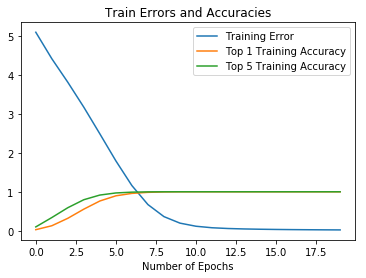

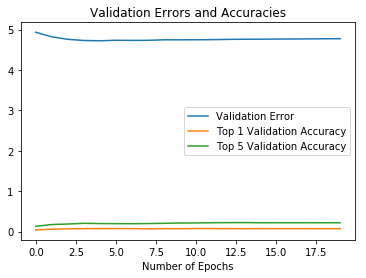

In [59]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE MLP MODEL [Answer: Q2.d.2]
plt.plot(mlp_train_errs)
plt.plot(mlp_train_accs_1)
plt.plot(mlp_train_accs_5)
plt.legend(['Training Error','Top 1 Training Accuracy','Top 5 Training Accuracy'])
plt.title('Train Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.show()
plt.title('Validation Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.plot(mlp_val_errs)
plt.plot(mlp_val_accs_1)
plt.plot(mlp_val_accs_5)
plt.legend(['Validation Error','Top 1 Validation Accuracy','Top 5 Validation Accuracy'])
plt.show()

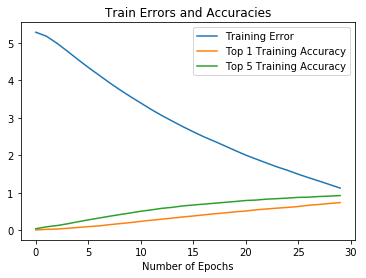

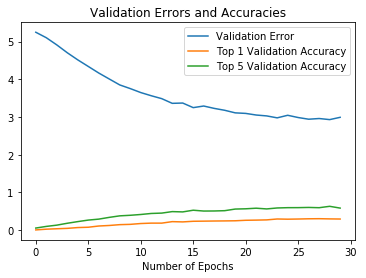

In [57]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE CNN MODEL [Answer: Q2.d.3]
plt.plot(cnn_train_errs)
plt.plot(cnn_train_accs_1)
plt.plot(cnn_train_accs_5)
plt.legend(['Training Error','Top 1 Training Accuracy','Top 5 Training Accuracy'])
plt.title('Train Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.show()
plt.title('Validation Errors and Accuracies')
plt.xlabel('Number of Epochs')
plt.plot(cnn_val_errs)
plt.plot(cnn_val_accs_1)
plt.plot(cnn_val_accs_5)
plt.legend(['Validation Error','Top 1 Validation Accuracy','Top 5 Validation Accuracy'])
plt.show()

<b>Answer for Q2.d.5:</b>

<font color=blue>I have also used cross entropy loss for this question since it yielded good results in the previous question and also since this is a classification task.</font>

<b>Answer for Q2.d.6:</b>

<font color=blue>The parameters were all chosen by trial and error. The epochs were observed if they would saturate or not or where the model will reach in maximum. In both of the networks, the approach mentioned in the first question is used. </font>

### Q2.e. Test MLP & CNN Networks - 9 pts

You should have obtained two trained networks so far. One of them comes from the MLP model and the other is from the CNN model. In this part, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the MLP model. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the CNN model. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
3. <font color=blue>\[Written\]</font> Give the top-1 and top-5 accuracy values on the test set for the MLP and the CNN models. Which architecture does work better than the other? Explain why.

In [16]:
# USE THIS CODE CELL TO IMPLEMENT TEST FUNCTION WHICH IS COMMON FOR BOTH MODEL
def test(netw,loss,tst_loader):
    correct_pred_5 = 0
    correct_pred_1 = 0
    all_pred = 0
    
    all_preds = []
    all_preds = []
    all_labels = []
    
    for inputs, labels in tst_loader:
        labels = labels-1
        all_labels.append(labels)
        inputs, labels = Variable(inputs), Variable(labels)
        
        #test outputs
        test_outputs = netw(inputs.float().cuda())

        
        #test top 1 accuracy
        _, pred = torch.max(test_outputs, -1)
        correct_pred_1 += (pred == labels.long().cuda()).sum().item()
        all_pred += [*labels.shape][0]
        
        all_preds.append(pred.cpu().numpy())
        
        #test top 5 accuracy
        _, preds = torch.topk(test_outputs, 5)
        
        for i in range([*labels.shape][0]):
            if labels[i] in (preds[i,:]).cpu():
                correct_pred_5 += 1
        
        del test_outputs, inputs, labels, preds, pred
    acc5 = correct_pred_5/all_pred
    acc1 = correct_pred_1/all_pred
    print("Average test top 1 accuracy: " + str(acc1))
    print("Average test top 5 accuracy: " + str(acc5))
    return all_preds, all_labels

In [60]:
# USE THIS CODE CELL TO LOAD BEST MLP MODEL
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

model = BirdMLP().cuda()
model.load_state_dict(torch.load(BEST_MLP_PATH))
mlp_preds, mlp_lbls = test(model,loss,test_loader_mlp)
mlp_lbls = np.concatenate(mlp_lbls)
mlp_preds = np.concatenate(mlp_preds)

del model
torch.cuda.empty_cache()

C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Average test top 1 accuracy: 0.06596194503171247
Average test top 5 accuracy: 0.18604651162790697


In [61]:
# USE THIS CODE CELL TO LOAD BEST CNN MODEL
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

model = BirdCNN().cuda()
model.load_state_dict(torch.load(BEST_CNN_PATH))
cnn_preds, cnn_lbls = test(model,loss_cnn,test_loader_cnn)
cnn_lbls = np.concatenate(cnn_lbls)
cnn_preds = np.concatenate(cnn_preds)

torch.cuda.empty_cache()

C:\Users\Dell\Anaconda3\envs\HW3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Average test top 1 accuracy: 0.30274841437632133
Average test top 5 accuracy: 0.5936575052854123


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

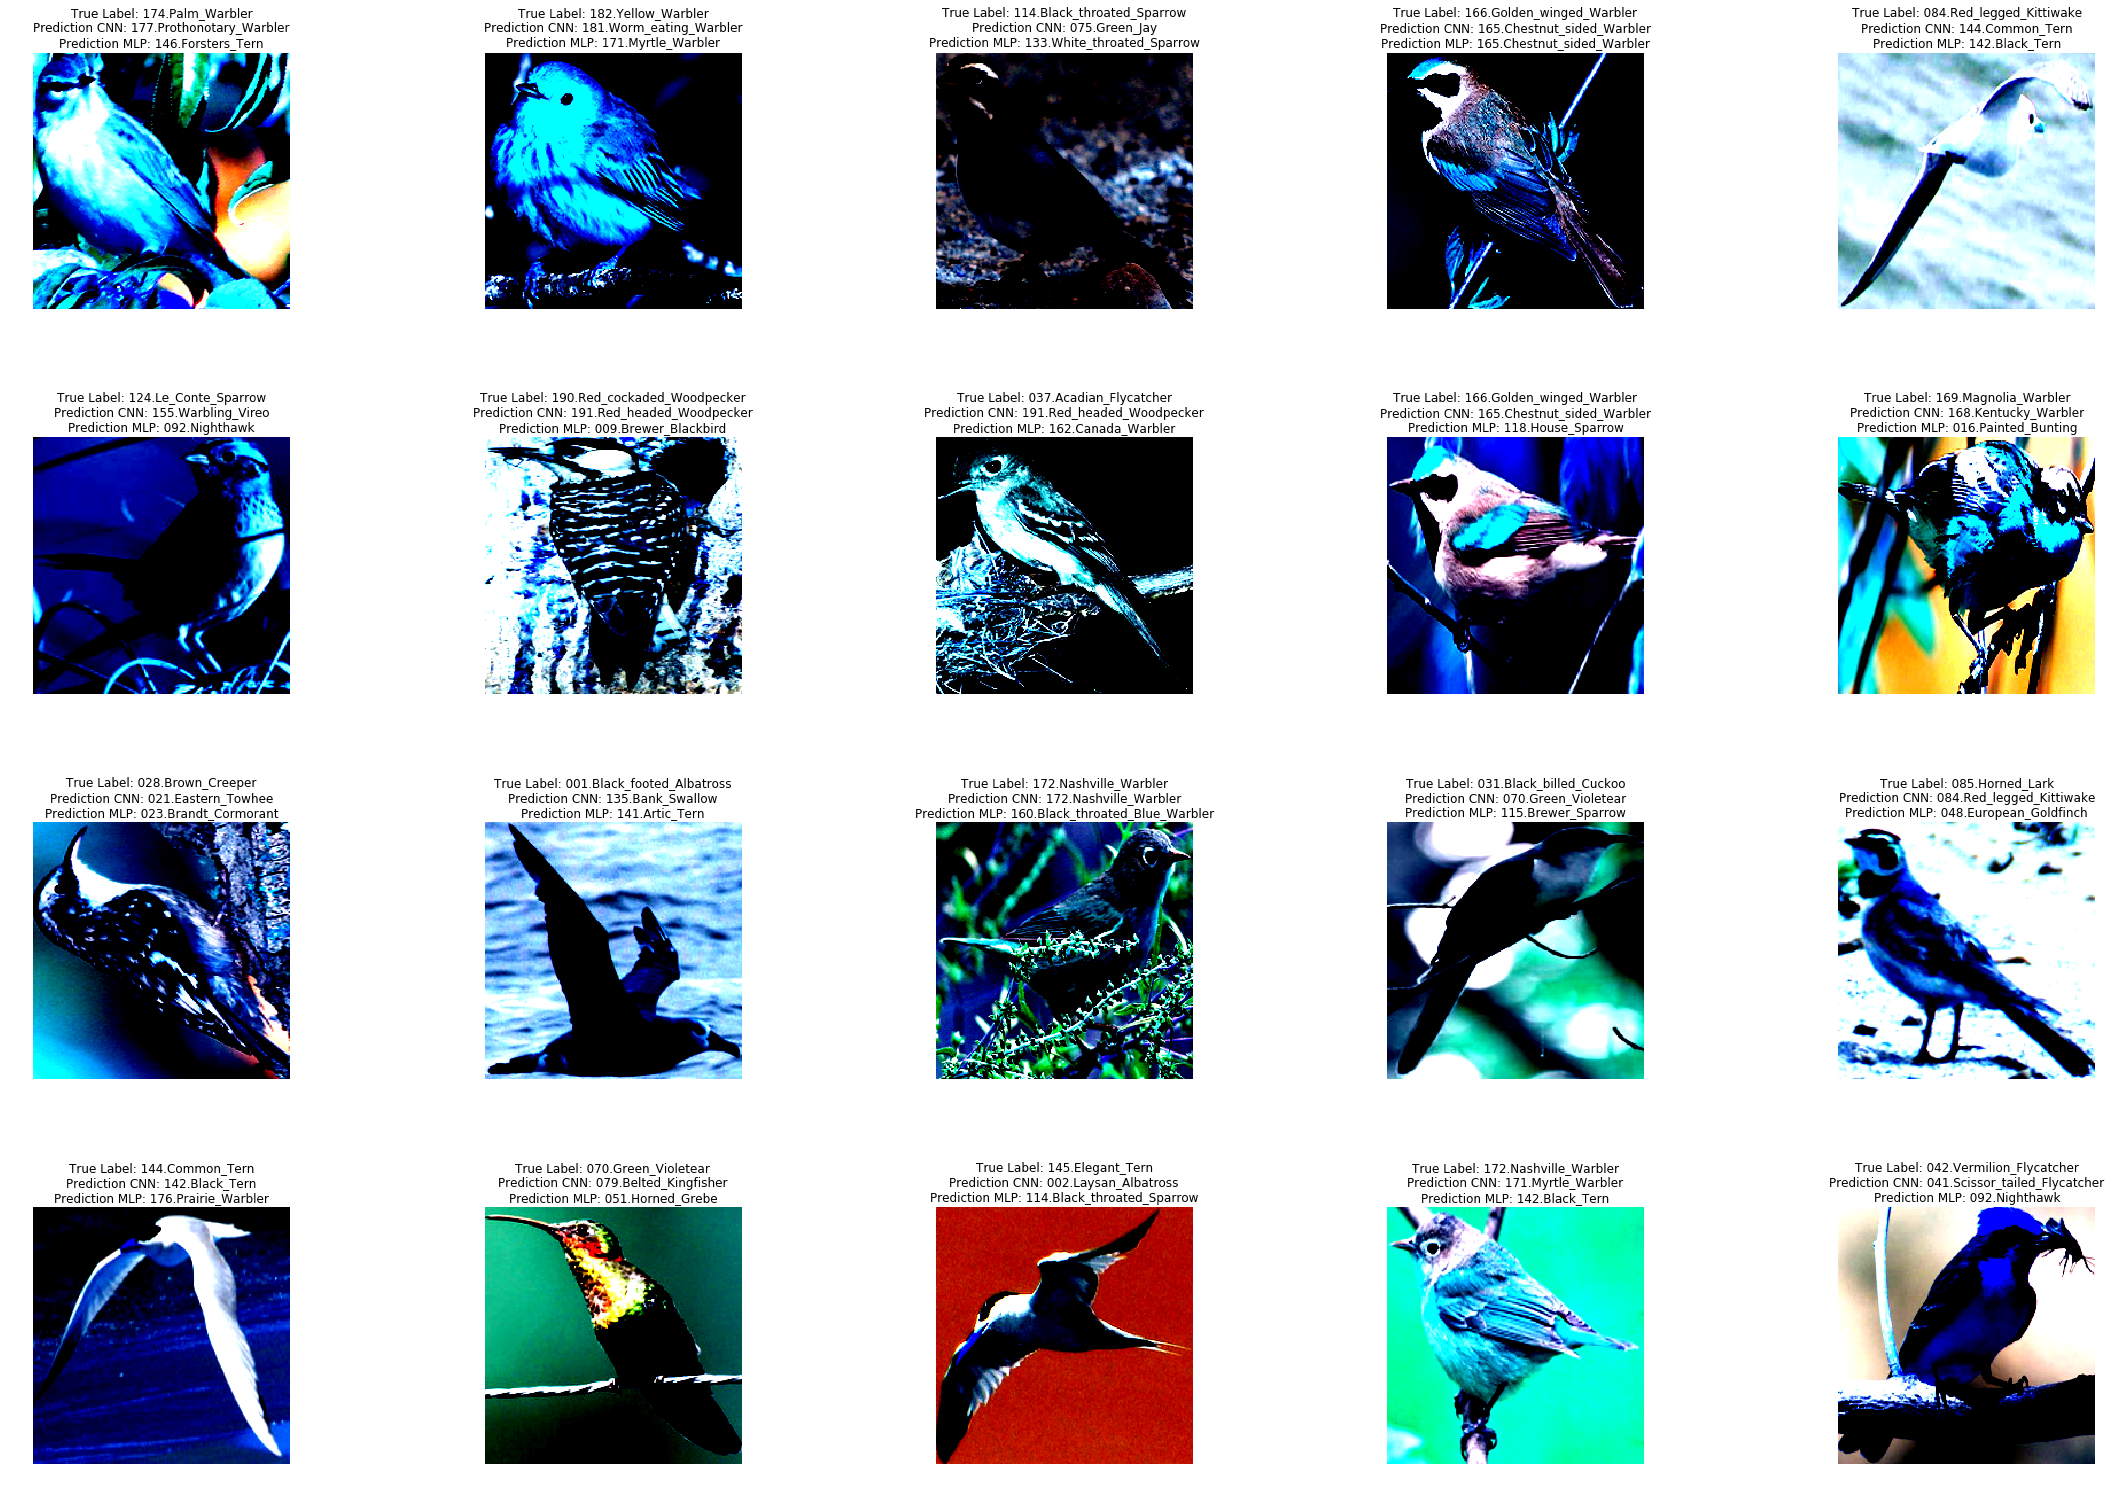

In [65]:
# USE THIS CODE CELL TO DISPLAY RANDOMLY SELECTED TEST SAMPLES WITH THEIR PREDICTED AND TARGET LABELS [Answer: Q2.e.3]
row = 4
col = 5
fig = plt.figure()
plt.subplots_adjust(left=0.125,right=5.0,bottom=0.1,top=5.0, wspace=0.5, hspace=0.5)

for i in range(row*col):
    rand_index = np.random.randint(test_set_cnn.__len__())
    sample,label = test_set_cnn[rand_index]
    ax = plt.subplot(row, col, i + 1)    
    ax.set_title('True Label: ' + classes.iloc[label-1,1] + '\nPrediction CNN: ' + classes.iloc[cnn_preds[rand_index]-1,1] + '\nPrediction MLP: ' + classes.iloc[mlp_preds[rand_index]-1,1])
    sample = np.transpose(sample.numpy(),(1,2,0))
    plt.imshow(sample)
    ax.axis('off')
    ax.autoscale(False)
plt.show()

<b>Answer for Q2.e.4:</b>

<font color=blue>The top 5 accurracy in the test sets for the CNN was found to be 59% and it was found to be 18.6% for the MLP approach. Although the results are under the requirements, I believe that nearly achieved what is expected. CNN yielded to a better results since in CNN, we are training the filter weights for better feature extaction and not the weights themselves only. This is achieved due to the convolution. The top 1 accuracy for the CNN model was 30%, which I believe was sufficient considering there are more than 200 classes to classify and considering this is not only a classification tas but a fine frained classification task.</font>

### Q2.f. Activation and Feature Map Visualization - 15 pts 

You have trained your CNN model. For this trained network, you will visualize the weights and outputs of the randomly selected (at most) 100 filters (feature maps) from the last convolutional layer, as images in a square grid format (10x10). You should select a single image from the test set to display its activation maps extracted from selected 100 filters. 

1. <font color=blue>\[Figure\]</font> Select an image from the test set and display it.
2. <font color=blue>\[Figure\]</font> Display the weights of randomly selected at most 100 filters from the last convolutional layer. Each filter weight should be represented as an image in a square grid.
3. <font color=blue>\[Figure\]</font> For the selected sample, compute the activation maps for the 100 filters (from 2nd question). Display each activation map as an image in a square grid (10x10).
4. <font color=blue>\[Written\]</font> Explain what these activation maps represent and why they are important.

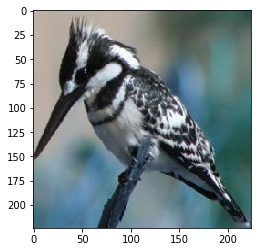

In [116]:
# USE THIS CODE CELL TO DISPLAY SELECTED SINGLE SAMPLE FROM TEST SET [Answer: Q2.f.1]
rand_index = np.random.randint(test_set_cnn.__len__())

rndSample = test_data.iloc[rand_index]
class_id = rndSample.loc['label']
f_path = image_folder_path + '/' + rndSample['name']
img = cv2.imread(f_path,cv2.IMREAD_UNCHANGED)
img_id = rndSample['idx']
bound_box = boxes.loc[boxes['id'] == img_id]

y = int(bound_box['y'])
h = int(bound_box['h'])
x = int(bound_box['x'])
w = int(bound_box['w'])
img = img[y:y+h,x:x+w]
img = cv2.resize(img, dsize=(dim_cnn, dim_cnn), interpolation=cv2.INTER_NEAREST)
plt.imshow(img)
plt.show()

(128, 64, 3, 3)


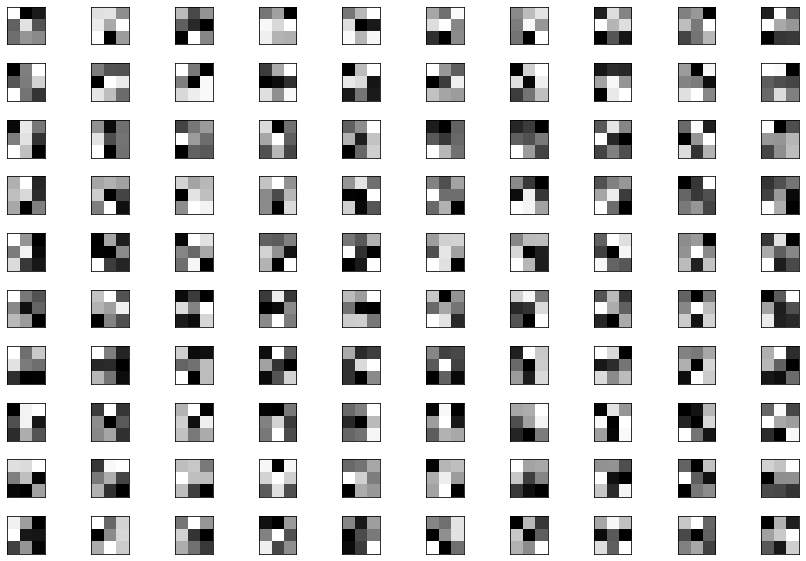

In [117]:
# USE THIS CODE CELL TO DISPLAY WEIGHTS OF THE SELECTED KERNELS [Answer: Q2.f.2]
weight = model.conv3.weight.data.cpu().numpy()
print(weight.shape)
plt.subplots_adjust(left=0.125,right=2.0,bottom=0.1,top=2.0, wspace=0.5, hspace=0.5)
kernels = []
for i in range(100):
        plt.subplot(10,10,i+1)
        wt = weight[np.random.randint(weight.shape[0]),np.random.randint(weight.shape[1])]
        kernels.append(wt)
        plt.imshow(wt, cmap='gray')
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

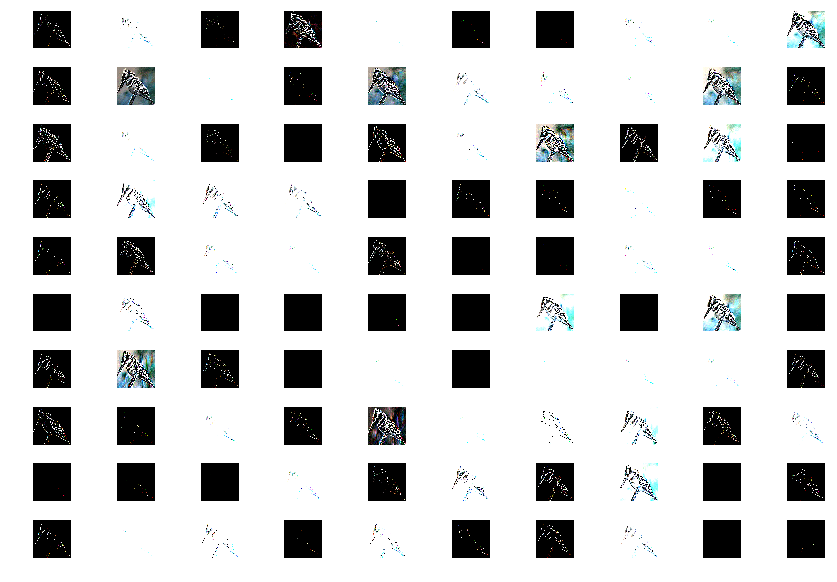

In [119]:
# USE THIS CODE CELL TO DISPLAY OUTPUTS OF THE SELECTED KERNELS [Answer: Q2.f.3]
import scipy.signal as sig

plt.subplots_adjust(left=0.125,right=2.0,bottom=0.1,top=2.0, wspace=0.5, hspace=0.5)
for i in range(100):
    ax = plt.subplot(10,10,i+1)
    img0 = sig.convolve2d(img[:,:,0],kernels[i])
    img1 = sig.convolve2d(img[:,:,1],kernels[i])
    img2 = sig.convolve2d(img[:,:,2],kernels[i])
    img_f = np.stack([img0,img1,img2], axis = 2)
    plt.imshow(img_f)
    ax.axis('off')
    ax.autoscale(False)
plt.show()
    

<b>Answer for Q2.f.4:</b>

<font color=blue>Activation maps represent the most discriminative and selective parts of the data. When the randomly taken filters were pulled from the model, and convolved with an image from the test set, since the kernel values are trained, the outputs show which parts of the photo does network consider important enough to extract. They are important since, we can observe what the network tends to learn with these activation maps.</font>